Nomes:


*   Matheus Xavier
*   Pedro Batista
*   Lucas Dias
*   Lucas Carvalho


In [387]:
# Importando as bibliotecas para os modelos
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report

# Modelos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import GridSearchCV
from google_drive_downloader import GoogleDriveDownloader as gdd


# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

#**Recebendo os Dados**

In [388]:
# Recebendo os dados:
data_google_id = '1J2MYIFR1zu1Zn9onRqNxj_4P3GuiZg39'
gdd.download_file_from_google_drive(file_id=data_google_id,
                                    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
                                    showsize = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
dados = pd.read_csv("dados.csv", sep = ',')

## **1 - Análise Exploratória dos dados**

In [389]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     729 non-null    float64
 1   season      728 non-null    object 
 2   yr          729 non-null    float64
 3   mnth        729 non-null    float64
 4   holiday     728 non-null    object 
 5   weekday     730 non-null    int64  
 6   workingday  726 non-null    object 
 7   weathersit  726 non-null    float64
 8   temp        729 non-null    float64
 9   atemp       728 non-null    float64
 10  hum         728 non-null    float64
 11  windspeed   728 non-null    float64
 12  cnt         727 non-null    float64
dtypes: float64(9), int64(1), object(3)
memory usage: 74.3+ KB


In [390]:
dados.isnull().sum()

instant       1
season        2
yr            1
mnth          1
holiday       2
weekday       0
workingday    4
weathersit    4
temp          1
atemp         2
hum           2
windspeed     2
cnt           3
dtype: int64

In [391]:
dados.describe()

,instant,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,cnt
count,729.000000,729.000000,729.000000,730.000000,726.000000,729.000000,728.000000,728.000000,728.000000,727.000000
mean,365.441701,0.499314,6.524005,2.997260,1.396694,20.307341,23.715580,62.781185,12.764629,4510.555708
std,211.016033,0.500343,3.452151,2.006161,0.545517,7.504969,8.158760,14.246235,5.201482,1933.903747
min,1.000000,0.000000,1.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,183.000000,0.000000,4.000000,1.000000,1.000000,13.803347,16.881400,52.000000,9.031466,3176.500000
50%,365.000000,0.000000,7.000000,3.000000,1.000000,20.431653,24.257900,62.625000,12.125325,4549.000000
75%,548.000000,1.000000,10.000000,5.000000,2.000000,26.855000,30.477187,73.010425,15.636209,5956.000000
max,730.000000,1.000000,12.000000,6.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'yr'}>, <Axes: title={'center': 'mnth'}>],
       [<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

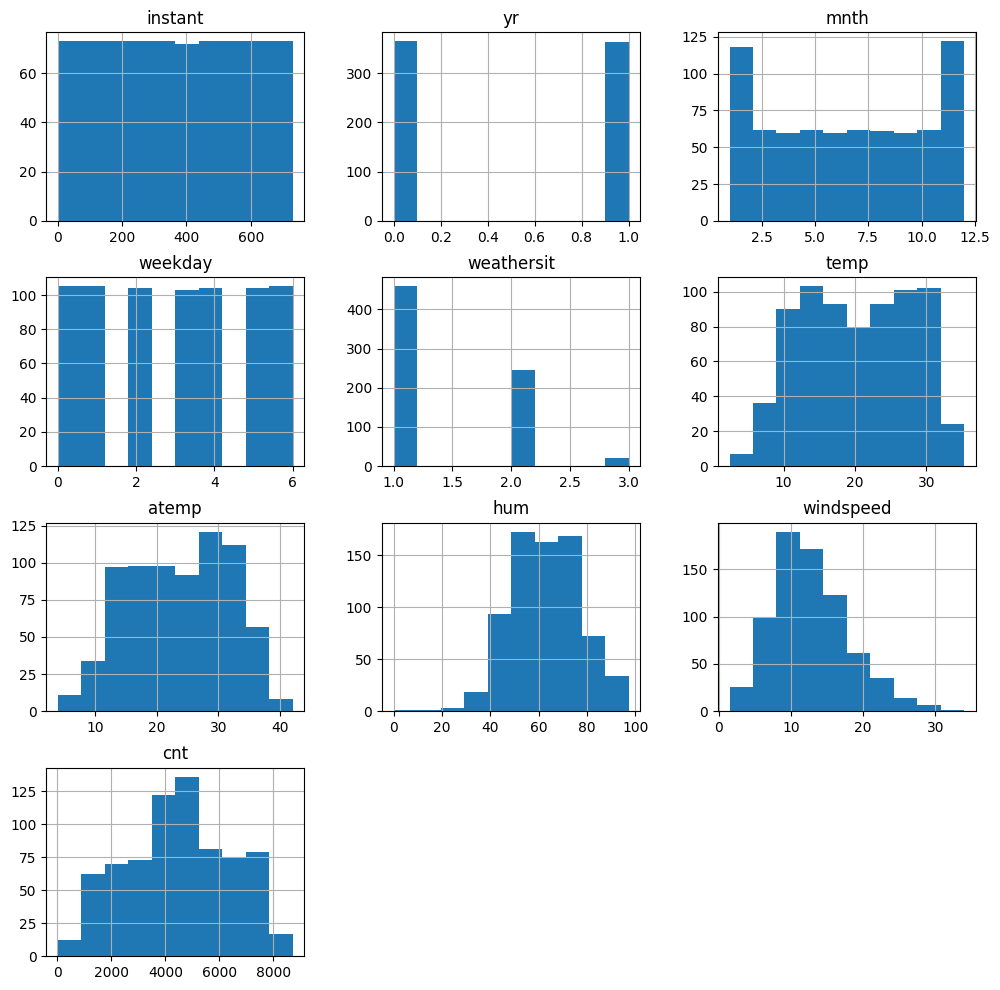

In [392]:
dados.hist(figsize=(12,12))

In [393]:
dados.drop(columns=['instant'], inplace = True)

Analisando as informações obtidas é possivel concluir que será necessário:
1 - Retirar valores nulos;
2 - Substituir colunas textuais por númericas;
3 - Realizar a normalização dos dados, já que as colunas não apresentam uma distribuição normal

#**Tratando os Dados**

##**2b e 3 - Tratando os Dados das Colunas**

**Season**

In [394]:
dados[dados['season'].isnull()]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
29,NaN,0.0,1.0,No,0,No,1.0,8.877402,12.51610,72.2174,4.956834,1096.0
296,NaN,0.0,10.0,No,1,Yes,1.0,18.996653,22.85335,77.2083,7.959064,4187.0


In [395]:
dados.loc[29, 'season'] = 'spring'
dados.loc[296, 'season'] = 'winter'

In [396]:
dados[dados['season'].isnull()]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt


In [397]:
dados['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [398]:
one_hot = pd.get_dummies(dados["season"],
prefix = "season")
one_hot.head()

,season_fall,season_spring,season_summer,season_winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [399]:
dados = pd.concat([dados, one_hot], axis=1)
dados.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,spring,0.0,1.0,No,6,No,2.0,14.110847,18.18125,80.5833,10.749882,985.0,0,1,0,0
1,spring,0.0,1.0,No,0,No,2.0,14.902598,17.68695,69.6087,16.652113,801.0,0,1,0,0
2,spring,0.0,1.0,No,1,NaN,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,0,1,0,0
3,spring,0.0,1.0,No,2,Yes,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,0,1,0,0
4,spring,0.0,1.0,No,3,Yes,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,0,1,0,0


In [400]:
dados.drop(columns = ['season'], inplace = True)

In [401]:
dados.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
0,0.0,1.0,No,6,No,2.0,14.110847,18.18125,80.5833,10.749882,985.0,0,1,0,0
1,0.0,1.0,No,0,No,2.0,14.902598,17.68695,69.6087,16.652113,801.0,0,1,0,0
2,0.0,1.0,No,1,NaN,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,0,1,0,0
3,0.0,1.0,No,2,Yes,1.0,8.200000,10.60610,59.0435,10.739832,1562.0,0,1,0,0
4,0.0,1.0,No,3,Yes,1.0,9.305237,11.46350,43.6957,12.522300,1600.0,0,1,0,0


**YR**

In [402]:
dados[dados['yr'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
624,NaN,9.0,No,1,Yes,2.0,23.814153,27.6525,73.4583,10.166714,6869.0,1,0,0,0


In [403]:
dados['yr'].value_counts()

0.0    365
1.0    364
Name: yr, dtype: int64

In [404]:
dados.loc[624, 'yr'] = 1.0

**mnth**

In [405]:
dados[dados['mnth'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
219,0.0,NaN,No,1,Yes,1.0,31.365,35.16415,59.2083,12.875725,4326.0,1,0,0,0


In [406]:
dados.loc[219, 'mnth'] = 7.0

In [407]:
dados[dados['mnth'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter


**Holiday**

In [408]:
dados['holiday'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [409]:
dados[dados['holiday'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
10,0.0,1.0,NaN,2,Yes,2.0,6.932731,9.5732,68.6364,8.182844,1263.0,0,1,0,0
487,1.0,5.0,NaN,4,Yes,2.0,22.960000,26.8621,76.8333,8.957632,6421.0,0,0,1,0


In [410]:
dados['holiday'].value_counts()

No     707
Yes     21
Name: holiday, dtype: int64

In [411]:
dados.loc[10, 'holiday'] = 'No'
dados.loc[487, 'holiday'] = 'No'

In [412]:
dados[dados['holiday'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter


In [413]:
dados['holiday'].replace({'No':0,'Yes': 1},
inplace=True)
dados['holiday'].unique()

array([0, 1])

**workingday**

In [414]:
dados[dados['workingday'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
2,0.0,1.0,0,1,NaN,1.0,8.050924,9.47025,43.7273,16.636703,1349.0,0,1,0,0
168,0.0,6.0,0,6,NaN,1.0,28.563347,32.19770,67.0417,8.000336,5119.0,0,0,1,0
385,1.0,1.0,0,6,NaN,2.0,7.106653,8.74375,83.1250,14.917014,1301.0,0,1,0,0
515,1.0,5.0,0,4,NaN,1.0,27.880000,31.56645,49.2917,13.083693,7338.0,0,0,1,0


In [415]:
dados['workingday'].value_counts()

Yes    497
No     229
Name: workingday, dtype: int64

In [416]:
mask = dados['workingday'].isnull()
dados.loc[mask, 'workingday'] = 'Yes'

In [417]:
dados[dados['workingday'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter


In [418]:
dados['workingday'].unique()

array(['No', 'Yes'], dtype=object)

In [419]:
dados['workingday'].replace({'No':0,'Yes': 1},
inplace=True)
dados['workingday'].unique()

array([0, 1])

**weathersit**

In [420]:
dados[dados['weathersit'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
56,0.0,2.0,0,6,0,NaN,11.582500,14.10960,53.7917,12.500257,1969.0,0,1,0,0
60,0.0,3.0,0,3,1,NaN,13.735000,16.00355,44.9583,20.624811,2134.0,0,1,0,0
345,0.0,12.0,0,1,1,NaN,9.771653,13.50980,67.0833,4.251150,3310.0,0,0,0,1
430,1.0,3.0,0,3,1,NaN,16.570847,19.25500,51.3333,23.167193,4916.0,0,1,0,0


In [421]:
dados['weathersit'].value_counts()

1.0    459
2.0    246
3.0     21
Name: weathersit, dtype: int64

In [422]:
mask2 = dados['weathersit'].isnull()
dados.loc[mask2, 'weathersit'] = 1.0

In [423]:
dados[dados['weathersit'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter


**temp**

In [424]:
dados[dados['temp'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
610,1.0,9.0,1,1,0,1.0,NaN,33.08145,79.0833,10.125107,6034.0,1,0,0,0


In [425]:
dados['temp'].median()

20.431653

In [426]:
mask3 = dados['temp'].isnull()
dados.loc[mask3, 'temp'] = 20.43

**atemp**

In [427]:
dados[dados['atemp'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
121,0.0,5.0,0,1,1,2.0,22.515847,NaN,73.0,12.291418,4401.0,0,0,1,0
501,1.0,5.0,0,4,1,1.0,24.326653,NaN,52.0,15.374825,7384.0,0,0,1,0


In [428]:
dados['atemp'].median()

24.2579

In [429]:
mask5 = dados['atemp'].isnull()
dados.loc[mask5, 'atemp'] = 24.25

**hum**

In [430]:
dados[dados['hum'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
177,0.0,6.0,0,1,1,2.0,27.982500,31.85020,NaN,7.208396,4708.0,1,0,0,0
496,1.0,5.0,0,6,0,1.0,23.130847,27.24085,NaN,8.249911,7429.0,0,0,1,0


In [431]:
dados['hum'].median()

62.625

In [432]:
mask4 = dados['hum'].isnull()
dados.loc[mask4, 'hum'] = 62.625

**windspeed**

In [433]:
dados[dados['windspeed'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
364,0.0,12.0,0,6,0,1.0,16.8100,20.70605,61.5833,NaN,2485.0,0,1,0,0
490,1.0,5.0,0,0,0,2.0,23.0625,27.33685,74.0000,NaN,6359.0,0,0,1,0


In [434]:
dados['windspeed'].median()

12.125325

In [435]:
mask6 = dados['windspeed'].isnull()
dados.loc[mask6, 'windspeed'] = 12.12

**cnt**

In [436]:
dados[dados['cnt'].isnull()]

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter
8,0.0,1.0,0,0,0,1.0,5.671653,5.80875,43.4167,24.250650,NaN,0,1,0,0
122,0.0,5.0,0,2,1,2.0,25.283347,29.10395,69.7083,22.958689,NaN,0,0,1,0
467,1.0,4.0,0,5,1,1.0,18.142500,21.59040,40.8333,10.416557,NaN,0,0,1,0


In [437]:
dados['cnt'].median()

4549.0

In [438]:
mask7 = dados['cnt'].isnull()
dados.loc[mask7, 'cnt'] = 4549.0

In [439]:
dados.isnull().sum()

yr               0
mnth             0
holiday          0
weekday          0
workingday       0
weathersit       0
temp             0
atemp            0
hum              0
windspeed        0
cnt              0
season_fall      0
season_spring    0
season_summer    0
season_winter    0
dtype: int64

##**4 - OUTLIERS**

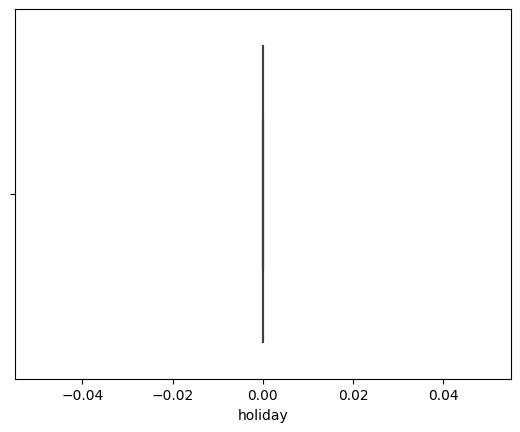

In [459]:
sns.boxplot(x=dados['holiday'])
plt.show()

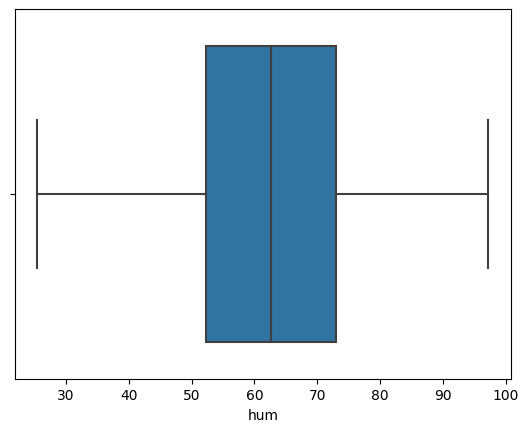

In [460]:
sns.boxplot(x=dados['hum'])
plt.show()

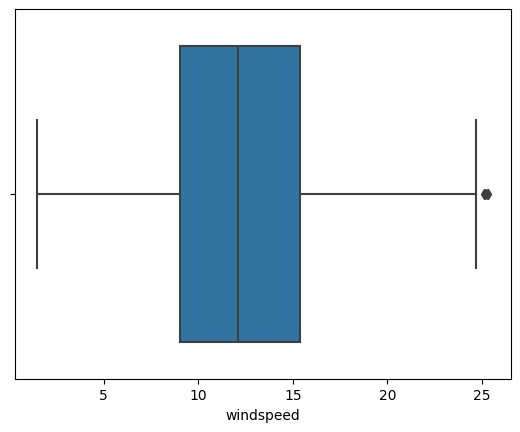

In [461]:
sns.boxplot(x=dados['windspeed'])
plt.show()

In [443]:
outl = ['holiday', 'hum', 'windspeed']

In [444]:
for coluna in outl:
    # Obtendo as informações numéricas do boxplot
    quartis = np.quantile(dados[coluna], [0.25, 0.75])

    # Calculando os limites superiores e inferiores:
    limite_inferior = quartis[0] - 1.5 * (quartis[1] - quartis[0])
    limite_superior = quartis[1] + 1.5 * (quartis[1] - quartis[0])

    # Obtendo o valor da mediana para substituir os outliers por ela
    mediana = dados[coluna].median()

    # Criando a máscara para filtrar as linhas dos dados acima ou abaixo dos limites do boxplot
    mask = (dados[coluna] < limite_inferior) | (dados[coluna] > limite_superior)

    # Exibindo a mensagem da quantidade de outliers que serão tratados
    print(f"A coluna '{coluna}' possui {mask.sum()} outliers para serem tratados")

    # Substituindo os valores que são outliers pela mediana dessa coluna
    dados.loc[mask, coluna] = mediana

A coluna 'holiday' possui 21 outliers para serem tratados
A coluna 'hum' possui 2 outliers para serem tratados
A coluna 'windspeed' possui 13 outliers para serem tratados


#**5 e 6 - HIPERPARAMETROS**

##**Dividindo o conjunto de dados**

In [445]:
# Dividindo x e y
X = dados.drop(columns=['cnt'])
y = dados['cnt']

# Dividindo dados para treino e dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [446]:

# Aplicando a normalização
scaler = MinMaxScaler().fit(X_train)
# Mudando a escala dos dados
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

##**Árvore de Decisões:**

In [447]:
modelo = DecisionTreeRegressor()

# Cria o GridSearchCV
parametros = {'max_depth':range(2,20), 'min_samples_leaf':range(2,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 17, 'min_samples_leaf': 9}

In [456]:
# Treinando o modelo
model_DTR = DecisionTreeRegressor(max_depth = 17, min_samples_leaf = 9)
model_DTR.fit(X_train, y_train)
y_pred_DTR = model_DTR.predict(X_test)

##**Modelo de Random Forest Regressor:**

In [449]:
modelo = RandomForestRegressor()

# Cria o GridSearchCV
parametros = {'min_samples_leaf':range(2,10), 'max_depth' : range(3,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 8, 'min_samples_leaf': 3}

In [457]:
# Treinando o modelo
model_rfr = RandomForestRegressor(max_depth = 8, min_samples_leaf = 3)
model_rfr.fit(X_train, y_train)
y_pred_RFR = model_rfr.predict(X_test)

##**Modelo de Gradient Boosting Regressor:**

In [451]:
modelo = GradientBoostingRegressor()

# Cria o GridSearchCV
parametros = {'min_samples_leaf':range(2,10), 'max_depth' : range(3,10)}
modelo_GS = GridSearchCV(modelo, parametros,)

# Esse modelo trabalha com k-fold cross validation
modelo_GS.fit(X_train, y_train)
modelo_GS.best_params_

{'max_depth': 3, 'min_samples_leaf': 8}

In [452]:
# Treinando o modelo
model_gbr = GradientBoostingRegressor(max_depth = 3, min_samples_leaf = 8)
model_gbr.fit(X_train, y_train)
y_pred_GBR = model_gbr.predict(X_test)

##**Regressão Linear:**

In [453]:
# Treinando o modelo
model_RL = LinearRegression().fit(X_train, y_train)
y_pred_RL = model_RL.predict(X_test)

##**7 - Métricas de desempenho dos modelos**

In [454]:
predicoes_regressao = {"Árvore de Decisões:" : y_pred_DTR,
                           "Modelo de Random Forest Regressor:" : y_pred_RFR,
                           "Modelo de Gradient Boosting Regressor:" : y_pred_GBR ,
                           "Regressão Linear:" : y_pred_RL}

In [458]:
for nome_reg, y_pred in predicoes_regressao.items():
  print('='*30)
  print(nome_reg)
  print(f"MSE = {mean_squared_error(y_test, y_pred)}")
  print(f"MAE = {mean_absolute_error(y_test, y_pred)}")
  print(f"R2 = {r2_score(y_test, y_pred)}")

Árvore de Decisões:
MSE = 598567.2697804781
MAE = 559.9391495364098
R2 = 0.8378927522669828
Modelo de Random Forest Regressor:
MSE = 430398.79341879
MAE = 454.40212025202635
R2 = 0.8834370548621551
Modelo de Gradient Boosting Regressor:
MSE = 380135.51560615486
MAE = 451.2543896502592
R2 = 0.8970496294876179
Regressão Linear:
MSE = 706275.0867579909
MAE = 621.7260273972603
R2 = 0.8087227347082886


#**8 - Justificativa Escolha do Melhor Modelo**

Por conta dos resultados apresentados em MSE e MAE de todos os modelos, nenhum deles seria escolhido numa situação real.
A única metrica boa é a R2, e baseando-se nela, o melhor modelo é o Gradient Boosting Regressor